In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f05d8472790>)

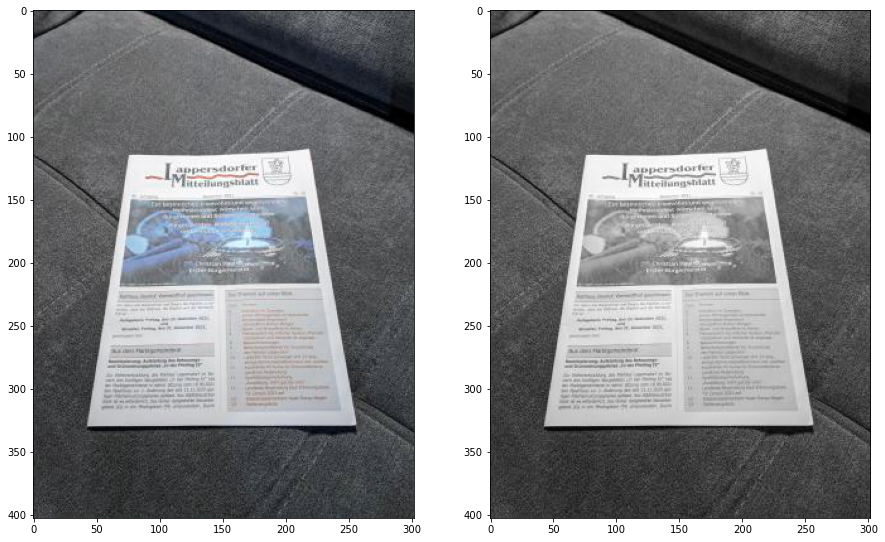

In [2]:
img = cv2.imread('document.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)/255
rows, cols = gray.shape

# Let's plot the image
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(gray, cmap='gray')

In [3]:
top_left = [76, 115]
top_right = [219, 111]
bottom_left = [43, 330]
bottom_right = [256, 329]

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f0540a05b20>)

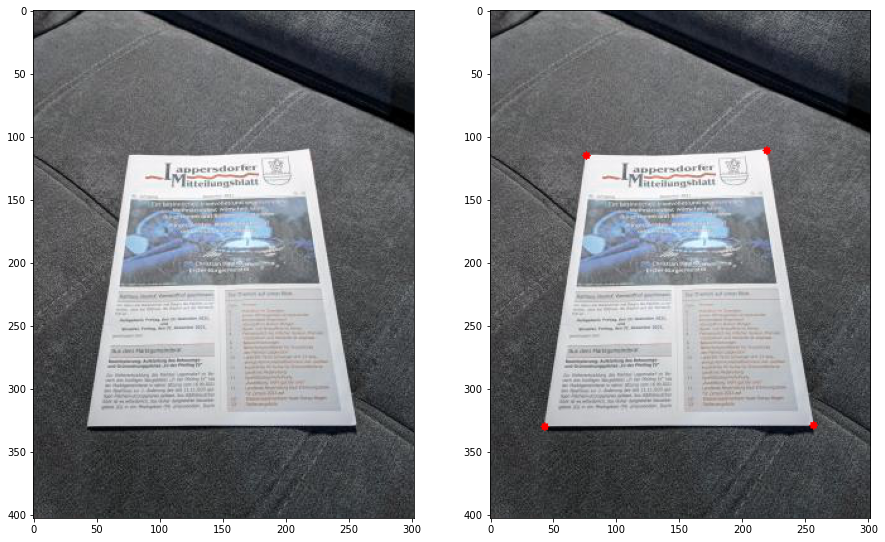

In [4]:
# Let's plot the points
out = np.copy(img)
out = cv2.circle(out, tuple(top_left), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(top_right), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(bottom_left), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(bottom_right), 3, (255,0,0), -1)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(out)

In [5]:
# Define the matrix of source points corresponding to the 4 document corners.
# The matrix shall have shape (4, 2), i.e., 4 corners x 2 coordinates
# Note: You will need to explicitly use float32 data type
top_left = np.array(top_left)
top_right = np.array(top_right)
bottom_left = np.array(bottom_left)
bottom_right = np.array(bottom_right)

all_points = np.array([top_left, top_right, bottom_left, bottom_right])
print(all_points)
src = np.array(all_points, dtype=np.float32)

# Define the matrix of target (destination) points corresponding to the 4 image corners.
# The matrix shall have shape (4, 2), i.e., 4 corners x 2 coordinates
# Note: You will need to explicitly use float32 data type
# Note2: The order of points in src and dst must be the same


top_left_d = np.array([0,0])
top_right_d = np.array([cols,0])
bottom_left_d = np.array([0,rows])
bottom_right_d = np.array([cols,rows])
all_points_d = np.array([top_left_d, top_right_d, bottom_left_d, bottom_right_d])
print(all_points_d)
#dst =

[[ 76 115]
 [219 111]
 [ 43 330]
 [256 329]]
[[  0   0]
 [302   0]
 [  0 403]
 [302 403]]


In [36]:
# Compute the affine transform matrix (you'll have to use getAffineTransform function from OpenCV here)
# Use the first 3 points from your src and dst matrix

three_points = np.delete(all_points, 3, 0)
three_points = np.float32(three_points)
three_points_d = np.delete(all_points_d, 3, 0)
three_points_d = np.float32(three_points_d)

M = cv2.getAffineTransform(three_points, three_points_d)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f64db5a8be0>)

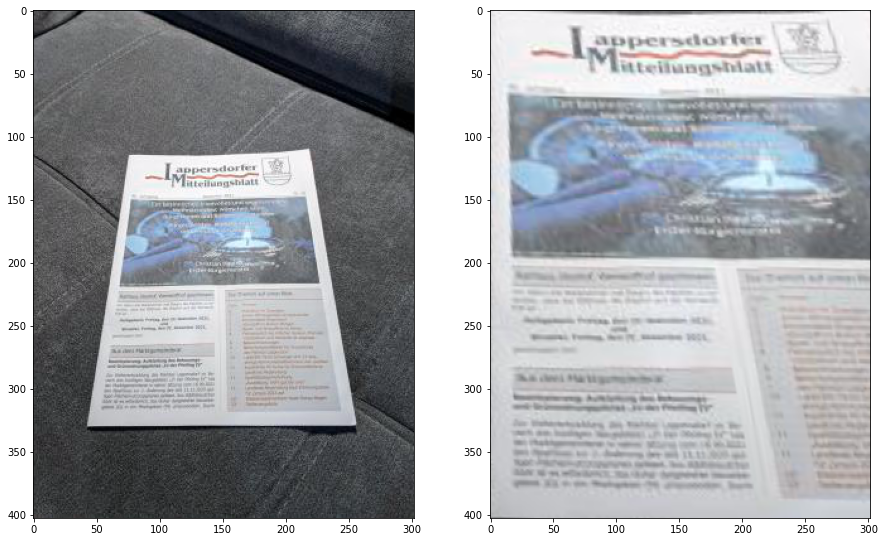

In [37]:
# Build the rectified image using the computed matrix (you'll have to use warpAffine function from OpenCV here)
rectified = cv2.warpAffine(img, M, (cols, rows))

# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f64d8b01a30>)

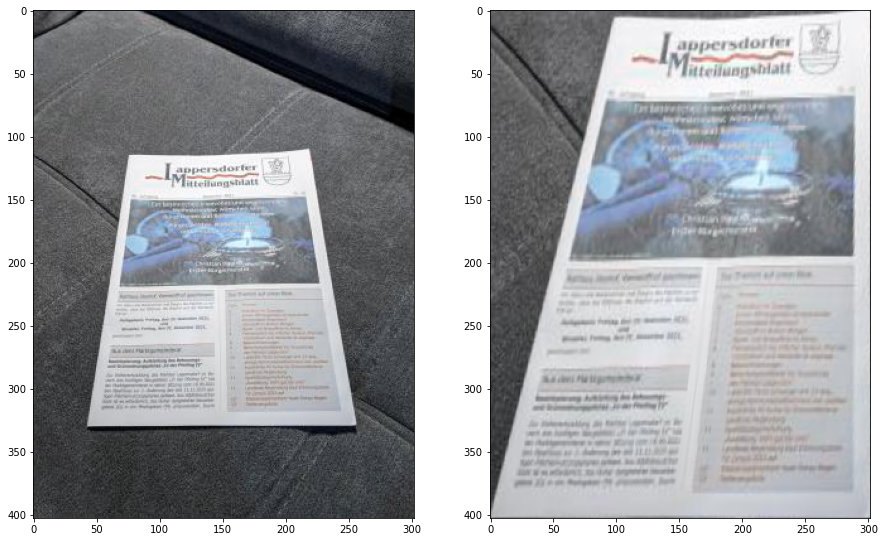

In [39]:
# Compute the affine transform matrix (you'll have to use getAffineTransform function from OpenCV here)
# Use the first 3 points from your src and dst matrix

three_points = np.delete(all_points, 0, 0)
three_points = np.float32(three_points)
three_points_d = np.delete(all_points_d, 0, 0)
three_points_d = np.float32(three_points_d)

M = cv2.getAffineTransform(three_points, three_points_d)

# Build the rectified image using the computed matrix (you'll have to use warpAffine function from OpenCV here)
rectified = cv2.warpAffine(img, M, (cols, rows))

# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)

In [13]:
# Estimate the optimal affine transform matrix (you'll have to use estimateAffine2D function from OpenCV here)
# estimateAffine2D it returns the best fitting affine matrix as well as the vector of inliers (1 -> inlier,
# 0 -> outlier).
all_points = np.float32(all_points)
all_points_d = np.float32(all_points_d)
M, inliers = cv2.estimateAffine2D(all_points, all_points_d, cv2.RANSAC, ransacReprojThreshold=5.0)

In [14]:
rectified = cv2.warpAffine(img, M, (cols, rows))

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f054088f100>)

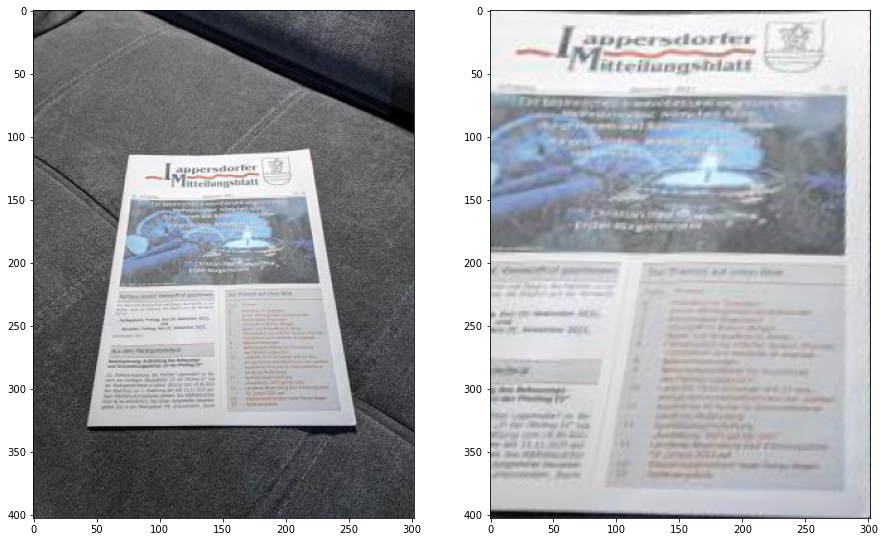

In [15]:
# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f054047d6d0>)

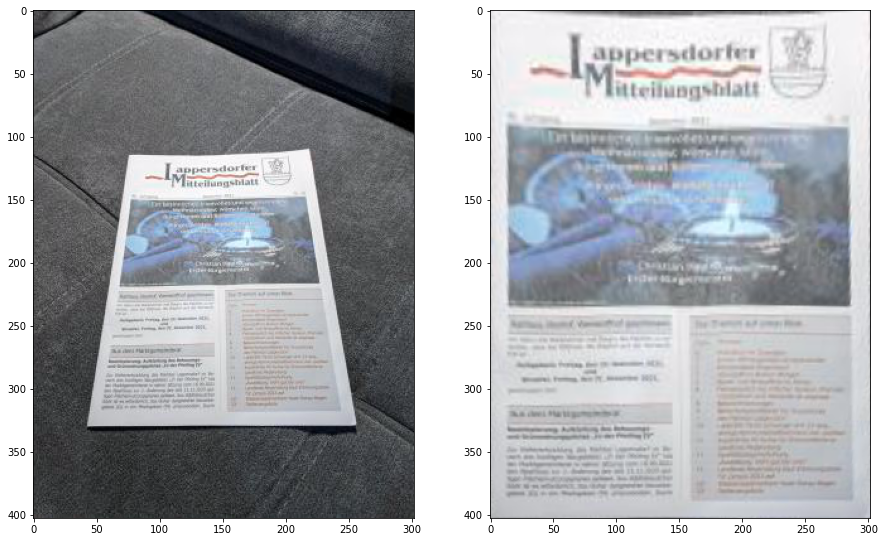

In [18]:
# Compute the homography matrix (you'll have to use getPerspectiveTransform function from OpenCV here)
M = cv2.getPerspectiveTransform(all_points, all_points_d)

# Build the rectified image using the computed matrix (you'll have to use warpPerspective function from OpenCV)
rectified = cv2.warpPerspective(img, M, (cols, rows))

# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)